<center><h1><b>Data Augmentation</b></h1></center>

This is a method of generating new sample dataset from existing dataset. This could be done by resizing, flipping, rotating, zooming, and changing contrast.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/LICENSE.txt
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/2625836599_03e192266f.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/16242239484_51286673af.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/5716633491_55e6f02645_n.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/13651218133_b6eb8e7ed2_m.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/8719032054_9a3ce4f0ff.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/9472854850_fc9e1db673.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/9293460423_7fbb1e3c32_n.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/9939430464_5f5861ebab.jpg
/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/dandelion/2535769822_513be6bbe9.jpg
/kaggl

In [2]:
# TO create a new directory in the Kaggle workspace
directory_path = '/kaggle/working/flower_photos'

# Check if directory exists, if not, create it
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    
print(f"Directory created at: {directory_path}")

Directory created at: /kaggle/working/flower_photos


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2
import os
import shutil
import pathlib  # To convert datadirectory into a pathlib that will help to convert each photo into numpy array
import PIL  # This is an image displaying library in python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint  # to save the best epoch(weights, bias)
from tensorflow.keras.models import load_model # to load model
from sklearn.model_selection import train_test_split


%matplotlib inline

In [4]:
#dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'  # The url to download the dataset from
#data_dir = tf.keras.utils.get_file('flowers_photo', origin='/kaggle/input/keras-flower-image-classification-with-gradio', cache_dir='.', untar=True)  # The function to save the photos in the created directory and unzip the directory using untar

In [5]:
# Path to the source dataset directory (where the files currently are)
source_dir = '/kaggle/input/flower-photos-by-the-tensorflow-team'

In [6]:
# Path to the target directory (where you want to move the files)
target_dir = './flower_photos'
# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

In [7]:
# Copy the contents from source directory to target directory
data_dir = shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)

In [8]:
# Checking if the files were copied successfully
print(f"Files in {data_dir}:")
print(os.listdir(data_dir))

Files in ./flower_photos:
['flower_photos']


In [9]:
# Data rirectory
data_dir

'./flower_photos'

In [10]:
# Converting data directory into a pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('flower_photos')

In [11]:
# Check the immediate subdirectories/files
list(data_dir.glob('*'))

[PosixPath('flower_photos/flower_photos')]

In [12]:
# Check for files with all extensions
list(data_dir.glob('**/*'))

[PosixPath('flower_photos/flower_photos'),
 PosixPath('flower_photos/flower_photos/tulips'),
 PosixPath('flower_photos/flower_photos/sunflowers'),
 PosixPath('flower_photos/flower_photos/LICENSE.txt'),
 PosixPath('flower_photos/flower_photos/dandelion'),
 PosixPath('flower_photos/flower_photos/daisy'),
 PosixPath('flower_photos/flower_photos/roses'),
 PosixPath('flower_photos/flower_photos/tulips/4579128789_1561575458_n.jpg'),
 PosixPath('flower_photos/flower_photos/tulips/13903937027_44b9f2f5b8.jpg'),
 PosixPath('flower_photos/flower_photos/tulips/7069622551_348d41c327_n.jpg'),
 PosixPath('flower_photos/flower_photos/tulips/4516198427_0e5099cd8e.jpg'),
 PosixPath('flower_photos/flower_photos/tulips/4312181724_16dab26afb_n.jpg'),
 PosixPath('flower_photos/flower_photos/tulips/142235914_5419ff8a4a.jpg'),
 PosixPath('flower_photos/flower_photos/tulips/13542672763_20c3cb9272.jpg'),
 PosixPath('flower_photos/flower_photos/tulips/3474066174_8d3b3e8f97_n.jpg'),
 PosixPath('flower_photos/flow

In [13]:
# List all images with the .jpg extension in all nested directories
len(list(data_dir.glob('**/*.jpg')))

3670

In [14]:
# Getting roses images
roses = list(data_dir.glob('flower_photos/roses/*'))
roses[:5]

[PosixPath('flower_photos/flower_photos/roses/3451177763_729a4d54af_n.jpg'),
 PosixPath('flower_photos/flower_photos/roses/4363734507_5cc4ed6e01.jpg'),
 PosixPath('flower_photos/flower_photos/roses/5602220566_5cdde8fa6c_n.jpg'),
 PosixPath('flower_photos/flower_photos/roses/5156037859_1673720a11_m.jpg'),
 PosixPath('flower_photos/flower_photos/roses/8524505546_b242bd4928_n.jpg')]

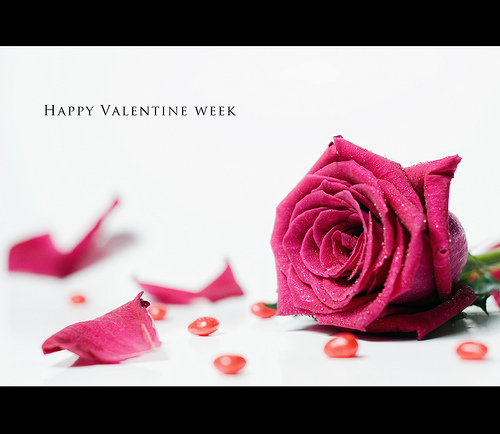

In [15]:
# To display an image using PIL
PIL.Image.open(str(roses[1]))

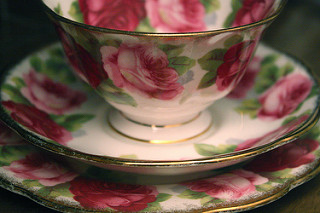

In [16]:
# To display an image using PIL
PIL.Image.open(str(roses[2]))

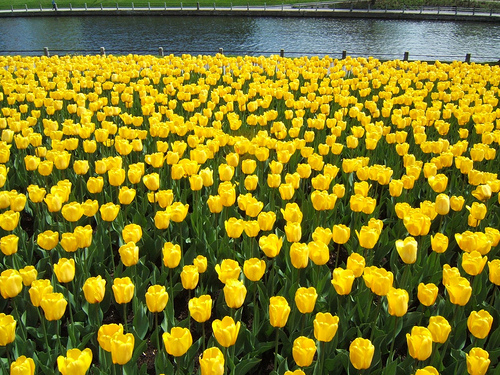

In [17]:
# Getting tulips images
tulips = list(data_dir.glob('flower_photos/tulips/*'))
PIL.Image.open(str(tulips[5]))

In [18]:
# Dictionary class for all the flowers
flowers_images_dict =  {
    'roses': list(data_dir.glob('flower_photos/roses/*')),
    'daisy': list(data_dir.glob('flower_photos/daisy/*')),
    'dandelion': list(data_dir.glob('flower_photos/dandelion/*')),
    'sunflowers': list(data_dir.glob('flower_photos/sunflowers/*')),
    'tulips': list(data_dir.glob('flower_photos/tulips/*'))
}

In [19]:
# Label dictionary
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [20]:
# Adding str to convert image path to string path
str(flowers_images_dict['roses'][0])

'flower_photos/flower_photos/roses/3451177763_729a4d54af_n.jpg'

In [21]:
# Using open cv2 to read files as numpy array
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[  5,  24,  31],
        [  5,  24,  31],
        [  5,  24,  31],
        ...,
        [ 50,  88,  88],
        [ 35,  78,  75],
        [ 21,  66,  63]],

       [[  5,  24,  31],
        [  5,  24,  31],
        [  5,  24,  31],
        ...,
        [ 56,  96,  95],
        [ 44,  86,  85],
        [ 32,  76,  75]],

       [[  5,  24,  31],
        [  4,  23,  30],
        [  4,  23,  30],
        ...,
        [ 63, 103, 102],
        [ 52,  94,  93],
        [ 42,  86,  85]],

       ...,

       [[ 29,  72,  57],
        [ 30,  73,  58],
        [ 32,  75,  62],
        ...,
        [ 39,  74,  64],
        [ 47,  82,  78],
        [ 56,  89,  92]],

       [[ 29,  72,  57],
        [ 30,  73,  58],
        [ 31,  74,  61],
        ...,
        [ 44,  79,  69],
        [ 53,  88,  84],
        [ 60,  95,  99]],

       [[ 28,  71,  56],
        [ 29,  72,  57],
        [ 29,  72,  59],
        ...,
        [ 45,  82,  72],
        [ 55,  92,  90],
        [ 64,  99, 103]]

In [22]:
img.shape

(240, 320, 3)

In [23]:
# Resizing the image
cv2.resize(img,(180, 180)).shape

(180, 180, 3)

In [24]:
# Runing a for loop to view number images in each class
for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))


roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [25]:
# Runing a for loop to resize all the images
X, y = [],[]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [26]:
len(X), len(y)

(3670, 3670)

In [27]:
# Converting X, and y into numpy arrays
X = np.array(X)
y = np.array(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
round(len(X_train)/len(X) * 100)

75

In [30]:
# Scaling the X_train values
X_train_scaled = X_train/255
X_test_scaled = X_test/255

## Building CNN Model

In [31]:
# Create a callback that saves the model with the best validation accuracy
checkpoint_callback = ModelCheckpoint(
    'flower_photos_best_model.keras',  # The path where the model will be saved
    monitor='val_accuracy',  # Metric to monitor (you can use 'val_loss' if you prefer)
    save_best_only=True,  # Save only the best model
    mode='max',  # 'max' because we want to maximize accuracy
    verbose=1  # Show a message when saving the best model
)

In [32]:
num_classes = 5

model = Sequential([
    # CNN Hyperparamenters
    layers.Conv2D(16,3, padding='same', activation='relu'),  # 16 filters with 3x3 size
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),  # 32 filters with 3x3 size
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),  # 64 filters with 3X3 size
    layers.MaxPooling2D(),
    
    
    # Dense layers
    layers.Flatten(), 
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)  # softmax activation could be used here
])

# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

# Training the model with validation data and the checkpoint callback
history = model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test), callbacks=[checkpoint_callback])

Epoch 1/30


I0000 00:00:1728697542.376969    3873 service.cc:145] XLA service 0x7f889c004980 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728697542.377066    3873 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


15/86 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2268 - loss: 2.6964

I0000 00:00:1728697544.716547    3873 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


84/86 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3251 - loss: 1.8274
Epoch 1: val_accuracy improved from -inf to 0.51634, saving model to flower_photos_best_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.3285 - loss: 1.8131 - val_accuracy: 0.5163 - val_loss: 1.1255
Epoch 2/30
84/86 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5891 - loss: 1.0519
Epoch 2: val_accuracy improved from 0.51634 to 0.60675, saving model to flower_photos_best_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5894 - loss: 1.0514 - val_accuracy: 0.6068 - val_loss: 0.9889
Epoch 3/30
84/86 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6758 - loss: 0.8597
Epoch 3: val_accuracy improved from 0.60675 to 0.62092, saving model to flower_photos_best_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6757 - loss: 0.8594 - val_accuracy: 0.6209 - val_loss: 0.9539
Epoch 4/30
82/86 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7471 - loss: 0.7147
Epoch 4: val_accu

### Loading the model and printing the best parameters

In [33]:
# Load the best model saved by ModelCheckpoint
best_model = load_model('flower_photos_best_model.keras')

# Evaluate the best model on the test data
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f'Best Accuracy: {accuracy * 100:.2f}%')
print(f'Best Loss: {loss:.4f}')

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6419 - loss: 0.9535
Best Accuracy: 64.71%
Best Loss: 0.9548


In [34]:
# Get weights and biases from the model
for layer in best_model.layers:
    if len(layer.get_weights()) > 0:  # Only print for layers that have weights (e.g., Conv and Dense layers)
        weights, biases = layer.get_weights()
        print(f'Layer {layer.name} Weights: {weights}')
        print(f'Layer {layer.name} Biases: {biases}')

Layer conv2d Weights: [[[[-0.10434125 -0.16058496  0.01657143  0.17366041  0.0271038
    -0.19657354  0.15705991 -0.11220944 -0.04184198 -0.06239215
    -0.10181572  0.09709845  0.08377825  0.13272433 -0.12650846
     0.01880154]
   [ 0.15210044  0.0587891   0.07269252 -0.0718296  -0.15076968
    -0.13286099  0.12330333 -0.20476153 -0.08164737  0.03209666
     0.16830759 -0.05131746  0.1580144   0.14813662  0.12630539
     0.05616456]
   [-0.10039415 -0.15728003 -0.04939125  0.07090629 -0.11322702
     0.05155083  0.17487492 -0.19543636 -0.02506244 -0.19935675
    -0.17781161 -0.12062093  0.05687757 -0.14631094 -0.0697739
    -0.09742279]]

  [[ 0.14922117 -0.1008794  -0.00497087  0.01697827 -0.16309687
     0.15874161 -0.02320159 -0.09645641  0.1704066   0.07023098
    -0.06338289 -0.10364624 -0.07871678  0.00379973  0.17078434
     0.16392983]
   [-0.0755353   0.13681367 -0.1767465  -0.1993477   0.05588164
     0.18641022  0.03226573 -0.1381336   0.16831051  0.07566561
     0.1376291

### Predictions

In [35]:
predictions = best_model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


array([[ 1.5489265 ,  1.5716573 ,  3.6015463 , -1.7227168 ,  0.14244449],
       [ 9.504702  , -1.216922  , -4.655306  , -5.2318316 ,  9.298082  ],
       [-0.70092595,  0.07104556,  3.0303392 ,  1.2862886 ,  1.1221082 ],
       ...,
       [ 1.358005  , -3.2838693 ,  1.9708909 , 10.047102  ,  1.2535919 ],
       [ 2.7415464 , -1.1636244 , -1.2127122 , -0.68102336,  4.3487773 ],
       [ 2.1211886 , -1.5783292 , -0.33325237,  5.992148  ,  0.97433794]],
      dtype=float32)

In [36]:
# to convert the predictions to probability score
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.09906661, 0.10134427, 0.77155846, 0.00375899, 0.02427169],
      dtype=float32)>

In [37]:
# using argmax to get the maimum value
np.argmax(score)

2

In [38]:
y_test[0]

1

## Augmentation of the Dataset 
This will help to address overfitting

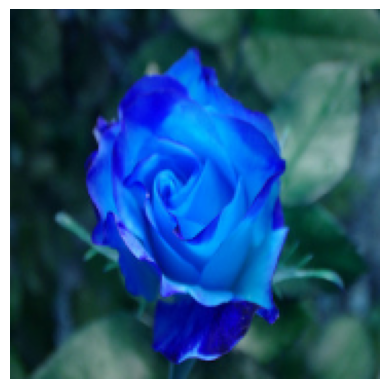

In [39]:
plt.axis('off')
plt.imshow(X[0]);

In [40]:
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.3),
])

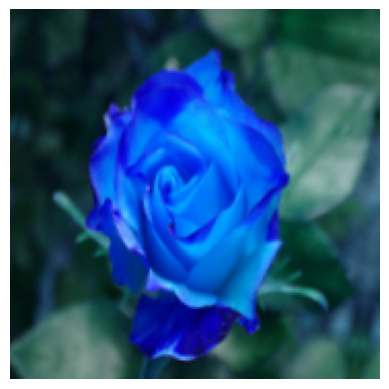

In [41]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'));

In [42]:
# Augmentation parameters to handle overfitting
data_augmentation = tf.keras.Sequential([
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.5),
    layers.RandomRotation(0.2),  # You can add other augmentations as needed
    layers.RandomFlip("horizontal_and_vertical")  # Randomly flip images
])

# Example of applying the data augmentation to your model's input
model_aug = tf.keras.Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),  # 16 filters with 3x3 size
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),  # 32 filters with 3x3 size
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),  # 64 filters with 3x3 size
    layers.MaxPooling2D(),
    layers.Dropout(0.2),  # This will drop 20% of the neourons at random to further address overfitting
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)  # softmax activation could be used here
])

# Compiling the model
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model with validation data and the checkpoint callback
model_aug.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test), callbacks=[checkpoint_callback])

Epoch 1/50


2024-10-12 01:46:39.946225: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_3_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3269 - loss: 1.5248
Epoch 1: val_accuracy did not improve from 0.64706
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.3281 - loss: 1.5216 - val_accuracy: 0.4749 - val_loss: 1.1869
Epoch 2/50
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5027 - loss: 1.1944
Epoch 2: val_accuracy did not improve from 0.64706
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5032 - loss: 1.1935 - val_accuracy: 0.5926 - val_loss: 1.0195
Epoch 3/50
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5612 - loss: 1.0753
Epoch 3: val_accuracy did not improve from 0.64706
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5612 - loss: 1.0754 - val_accuracy: 0.6002 - val_loss: 1.0030
Epoch 4/50
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5808 - loss: 1.0358
Epoch 4: val_accuracy did not improve from 0.64706
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5809 - loss: 1.0354 - val_accuracy: 0.5697 - val_loss: 1.0218
Epo

In [43]:
# Load the best model saved by ModelCheckpoint
best_model = load_model('flower_photos_best_model.keras')

# Evaluate the best model on the test data
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f'Best Accuracy: {accuracy * 100:.2f}%')
print(f'Best Loss: {loss:.4f}')

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7550 - loss: 0.8028
Best Accuracy: 75.05%
Best Loss: 0.7642
